# **Project Name**    -  Bike Sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Team
##### **Team Member 1 -** Ankit
##### **Team Member 2 -**Praneeth

# **Project Summary -**

The goal of the cycle Sharing Demand Prediction dataset is to foresee demand for cycle rentals by collecting statistics on bike sharing . The dataset includes a total of 8760 rows, with 14 columns of data.The Features present in the dataset are Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day.


The  Rented Bike data is  from the end of 2017 to complete year 2018.The data has no null values and no duplicate values.The Features Temperature and Dew_point_temperature has 91% of correlation. For the Features like rainfall,Solar_radiations and snowfall 90% of values are 0 . The Features Rented_Bike_Count , Wind_speed are left skewed  can be made as normal distribution by using square root transformations. The Features like Visibitlity are right skewed. Features like Holiday and Functioning Day are imbalanced Features. Temperature and Hour are highly correlated with Target Feature.


The Outliers found in the Rented_Bike_Count feature are treated with outliers capping technique. Encoded Data with LabelEncode and Tranformed the left skewed data with Square root transformation.The RandomForestRegresor has the Train and test r2_score of 0.91 and 0.91 but the Train RMSE and Test RMSE are 3.3 & 3.2 respectively.The DecisionTreeRegressor has the Train and test r2_score of 0.89and 0.89 but the Train RMSE and Test RMSE are 3.6 & 3.6 respectively.The GradientBoostingRegressor has the Train and test r2_score of 0.98and 0.98 but the Train RMSE and Test RMSE are 1.2& 1.2  respectively. The Best model is GradientBoostingRegressor it gave the R2_Score on the Unseen Data X_val as well.





# **GitHub Link -**

https://github.com/PraneethKumar126/ML_Capstone.git

# **Problem Statement**


<b>Business Context</b>

At the moment, rental bikes are being introduced in many metropolitan areas to improve transportation comfort. It is crucial to make the rental bikes approachable and available to the general public at the appropriate moment because it reduces waiting. Eventually, maintaining a steady supply of rental motorcycles for the community emerges as a top priority. Predicting the number of bikes needed to maintain a steady flow of renting bikes is essential.

<b> Data Dictionary</b>

<table>
<tr><th>feild</th><th>Description</th></tr>
<tr><td>Date</td><td>Date</td></tr>
<tr><td>Hour</td><td>Hour of the day(0-23)</td></tr>
<tr><td>Temperature(°C)</td><td>Temperature of the day</td></tr>
<tr><td>Humidity(%)</td><td>Humidity measure</td></tr>
<tr><td>Wind speed (m/s)</td><td>Windspeed</td></tr>
<tr><td>Visibility (10m)</td><td>Visibility measure</td></tr>
<tr><td>Dew point temperature(°C)</td><td>Dew Point temperature Meaure</td></tr>
<tr><td>Solar Radiation (MJ/m2)</td><td>Solar Radiation Measure</td></tr>
<tr><td>Rainfall(mm)</td><td>Rainfall in mm</td></tr>
<tr><td>Snowfall (cm)</td><td>Snowfall measure</td></tr>
<tr><td>Seasons</td><td>1=Spring,2=Summer,3=fall,4=winter</td></tr>
<tr><td>Holiday</td><td>Whether a holiday or not</td></tr>
<tr><td>Functioning Day</td><td>Wheather a funtional day or not</td></tr>


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [337]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import stats
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

### Dataset Loading

In [262]:
# Mounting the drive to colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [338]:
# Load Dataset
Data=pd.read_csv('/content/drive/MyDrive/Almabetter/ML Regression/SeoulBikeData.csv',encoding= 'unicode_escape')

### Dataset First View

In [343]:
# Dataset First Look
Data.head()


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns count

In [265]:
# Dataset Rows & Columns count
Data.shape

(8760, 14)

### Dataset Information

In [266]:

# Dataset Info
Data.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

#### Duplicate Values

In [268]:
# Dataset Duplicate Value Count
print("The Duplicate value count",Data.duplicated().sum())

The Duplicate value count 0


#### Missing Values/Null Values

In [269]:
# Missing Values/Null Values Count
Data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

<Axes: >

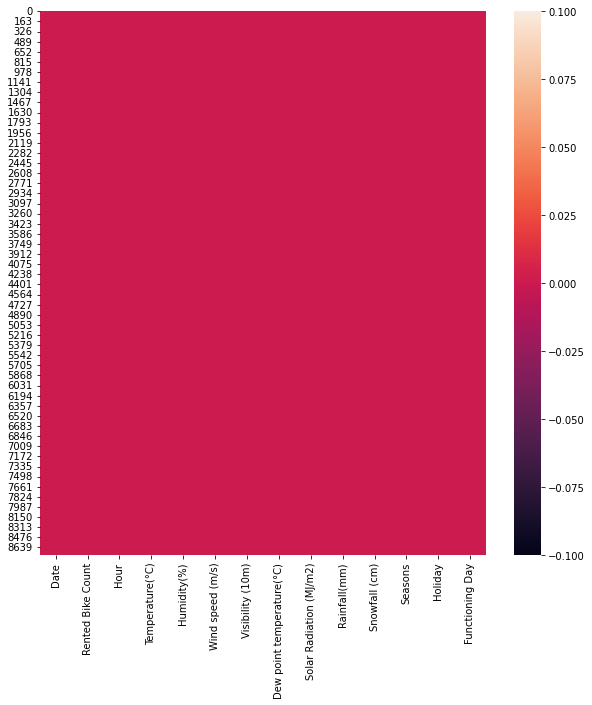

In [270]:
# Visualizing the missing values
plt.figure(figsize=(10,10))
sns.heatmap(Data.isnull())

### What did you know about your dataset?

From the dataset we got to know that


1.   Categorical Features are ['Seasons,'Holiday','FunctioningDay','Hour']
2.   Continoues features are ['Rented Bike Count','Temperature','Humidity','Visibility','Dew point temperature(°C)','Solar Radiation (MJ/m2)','Rainfall','Snowfall']

3. We need to change the feature Date type from object to datetime

4. There are no missing values in the Dataset
5. We need to rename the column names Temperature(°C),Humidity(%)
,Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)





## ***2. Understanding Your Variables***

In [271]:
# Dataset Columns
Data.columns


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [272]:
# Dataset Describe
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


### Variables Description 

1. The Features **Rented Bike Count,Rainfall,Snowfall** might have outlier because of the difference between the Quantile 3 and Max is huge.
    *   For Rented Bike Count Q3(75%) value is 1065 and Max is 3556.
    *   For Rainfall and Snowfall the value till Q3 is 0 but the max is 35 and 8.8
2. For Visibility the Max value  and Q3 value is same(2000) 

### Check Unique Values for each variable.

In [273]:
# Check Unique Values for each variable.
for i in Data.columns:
  print(i,"=",*Data[i].unique())

Date = 01/12/2017 02/12/2017 03/12/2017 04/12/2017 05/12/2017 06/12/2017 07/12/2017 08/12/2017 09/12/2017 10/12/2017 11/12/2017 12/12/2017 13/12/2017 14/12/2017 15/12/2017 16/12/2017 17/12/2017 18/12/2017 19/12/2017 20/12/2017 21/12/2017 22/12/2017 23/12/2017 24/12/2017 25/12/2017 26/12/2017 27/12/2017 28/12/2017 29/12/2017 30/12/2017 31/12/2017 01/01/2018 02/01/2018 03/01/2018 04/01/2018 05/01/2018 06/01/2018 07/01/2018 08/01/2018 09/01/2018 10/01/2018 11/01/2018 12/01/2018 13/01/2018 14/01/2018 15/01/2018 16/01/2018 17/01/2018 18/01/2018 19/01/2018 20/01/2018 21/01/2018 22/01/2018 23/01/2018 24/01/2018 25/01/2018 26/01/2018 27/01/2018 28/01/2018 29/01/2018 30/01/2018 31/01/2018 01/02/2018 02/02/2018 03/02/2018 04/02/2018 05/02/2018 06/02/2018 07/02/2018 08/02/2018 09/02/2018 10/02/2018 11/02/2018 12/02/2018 13/02/2018 14/02/2018 15/02/2018 16/02/2018 17/02/2018 18/02/2018 19/02/2018 20/02/2018 21/02/2018 22/02/2018 23/02/2018 24/02/2018 25/02/2018 26/02/2018 27/02/2018 28/02/2018 01/

## 3. ***Data Wrangling***

### Data Wrangling Code

In [274]:
# Write your code to make your dataset analysis ready.
# Convert Date object into datetime

Data['Date']=pd.to_datetime(Data['Date'], infer_datetime_format=True)
# Create Month Feature from the Date
Data['Day']=Data['Date'].dt.day
Data['Month']=Data['Date'].dt.month
Data['Year']=Data['Date'].dt.year
Data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017


In [275]:
# Renaming the Feature Names
new_column_names={'Rented Bike Count':'Rented_Bike_Count',
                  'Temperature(°C)':'Temperature',
                  'Humidity(%)':'Humidity',
                  'Wind speed (m/s)':'Wind_speed',
                  'Visibility (10m)':'Visibitlity', 
                  'Dew point temperature(°C)':'Dew_point_temperature',
                  'Solar Radiation (MJ/m2)':'Solar_Radiation', 
                  'Rainfall(mm)':'Rainfall', 
                  'Snowfall (cm)':'Snowfall',
                  'Functioning Day':'Functioning_Day'
}

Data.rename(columns=new_column_names,inplace=True)
Data.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibitlity,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Day,Month,Year
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [276]:
Categorical=['Hour','Seasons','Holiday','Functioning_Day','Month','Day','Year']
Continoues=['Rented_Bike_Count','Temperature','Humidity','Wind_speed','Visibitlity','Dew_point_temperature','Solar_Radiation',
           'Rainfall','Snowfall']


#### Chart - 1

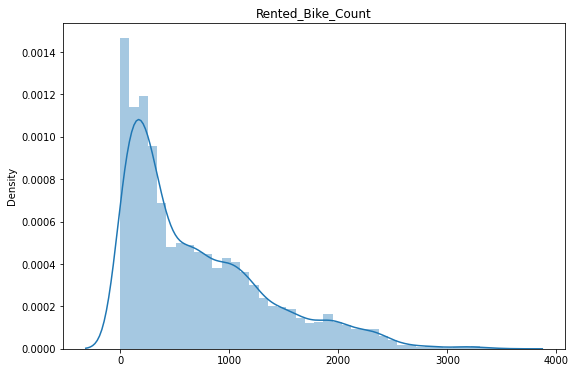

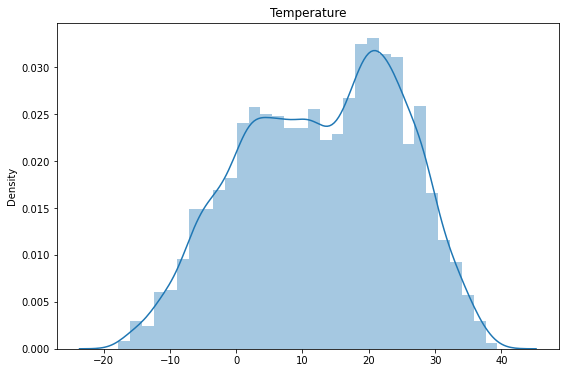

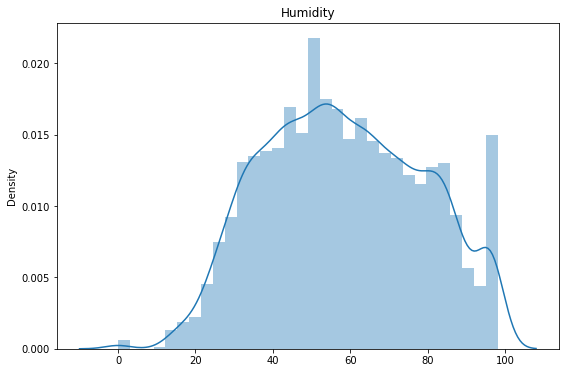

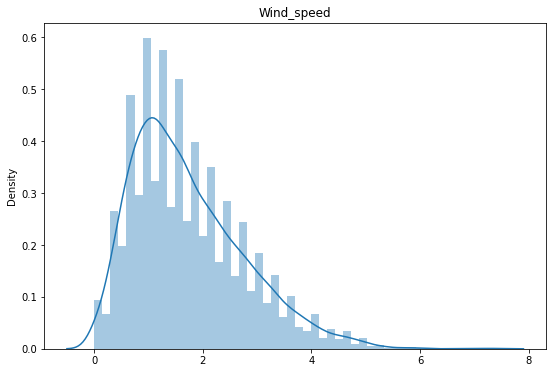

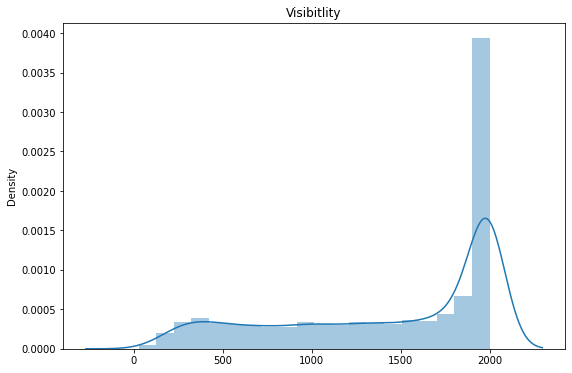

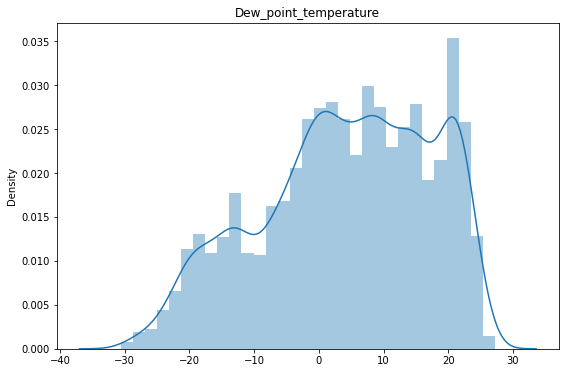

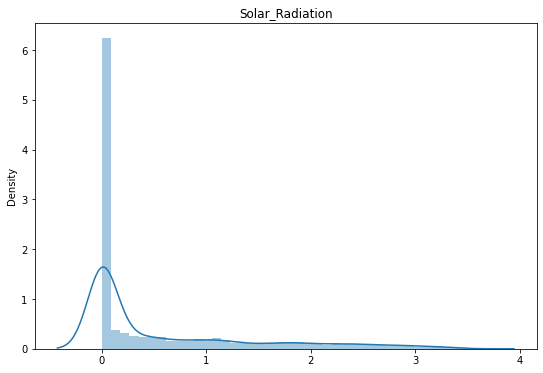

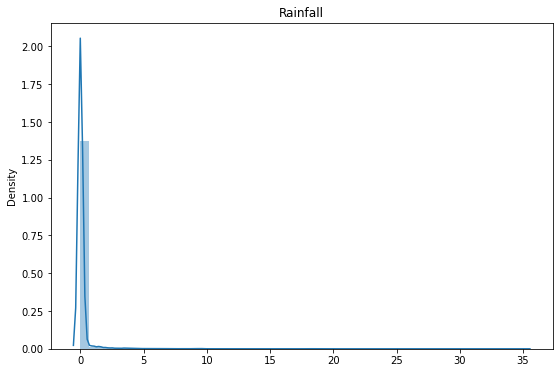

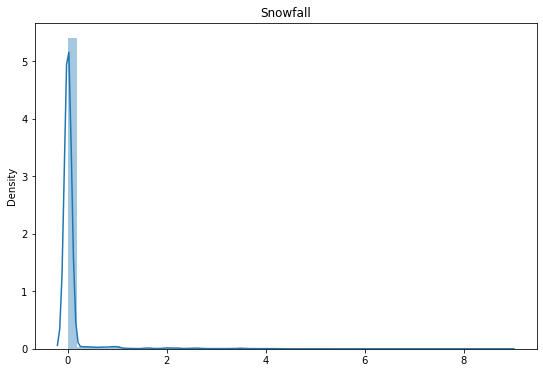

In [277]:
# Chart - 1 visualization code
import warnings
warnings.filterwarnings('ignore')

for col in Continoues:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    sns.distplot(x=Data[col]).set(title=col)



##### 1. Why did you pick the specific chart?

Distplot provides a quick and easy way to visualize the shape of the distribution .The resulting plot shows a histogram of the data and the Kernel Density estimate and provides a smooth density of the data.

##### 2. What is/are the insight(s) found from the chart?

In the plots we observed that some of our columns are right skewed and some are left skewed. We need to apply transformations for make skewness less.

**Right skewed features are**:Rented Bike Counts,Wind speed, Solar Radiation, Rainfall,Snowfall

**left skewed features are **: Visibility , Dew point temperature

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The Insights from the above graphs are positive , because from the above inghts we saw skewness which is caused by the outliers present in the data distribution. By applying the transformations like squre root and square can reduce the outliers and  make the skewed distribution to normal distribution.

#### Chart - 2

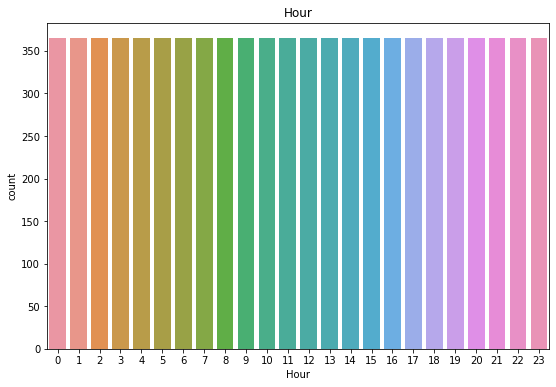

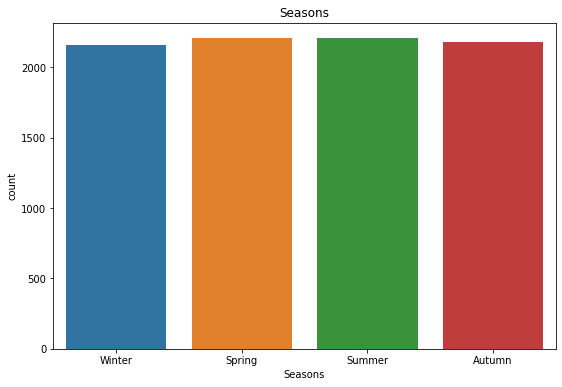

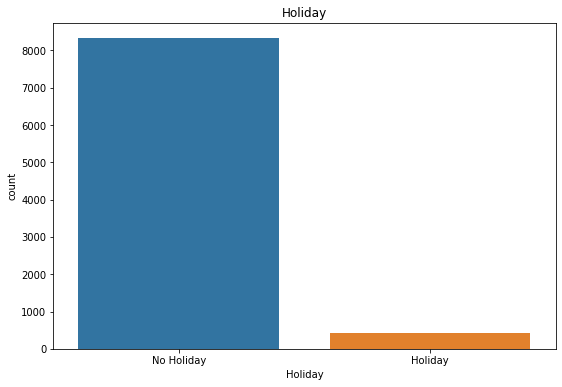

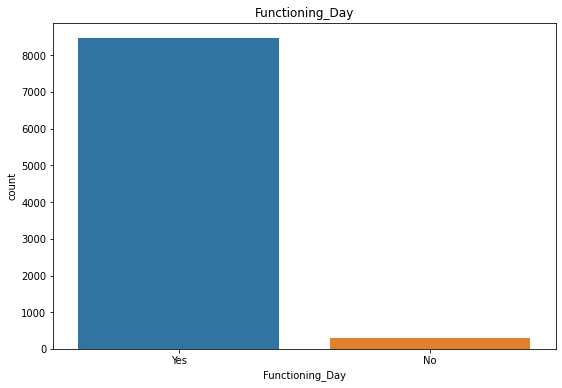

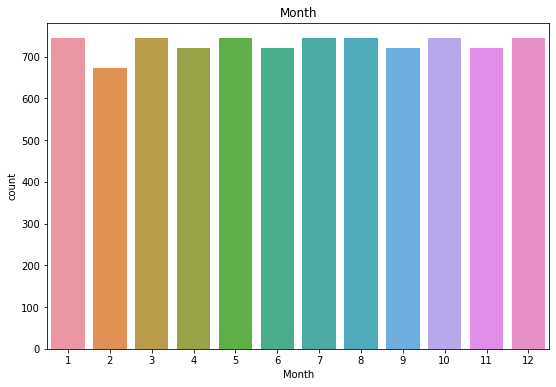

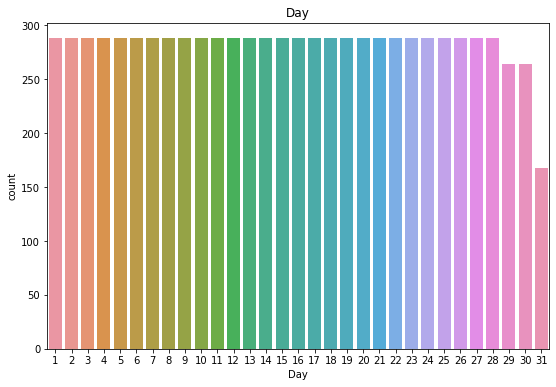

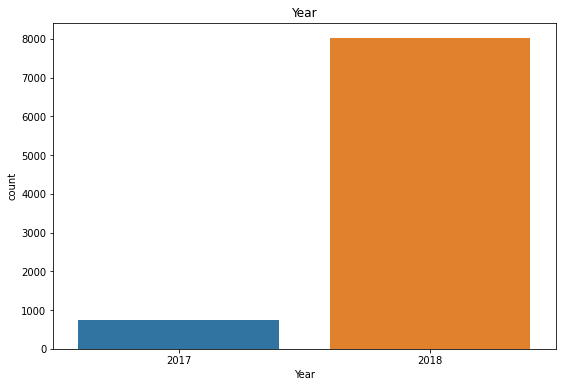

In [278]:
# Chart - 2 visualization code
for col in Categorical:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    sns.countplot(data=Data,x=col).set(title=col)

##### 1. Why did you pick the specific chart?

It provides a quick and easy way to visualize the frequency distribution of categorical data. The resulting plot shows the number of occurrences of each category in the dataset.

##### 2. What is/are the insight(s) found from the chart?

From the above count plots we understood that all the features have almost equal  distribution except the features like **Year , Holiday and Functioning_Day**.

From the countplot of **Year** we found that the Data has only some rows from the year 2017  and many rows of 2018. So the data may started from the last quarter of the Year 2017 . 

From the countplot of **Holiday** we found that very few people rented the bike on the Holiday and Many people rented the bike on No Holiday . Which means People are renting the Bike for the work.

From the countplot of **Funtioning_Day** we found that very few people rented the bike on the *Non Funtioning_Day* and Many people rented the bike on *Funtioning_Day* . Which means People are renting the  Bike for the work and On *Non Funtioning_Day * They are using other ways of transport or taking rest.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 3

Text(0.5, 1.0, 'Hour V/s Rented_Bike_Count')

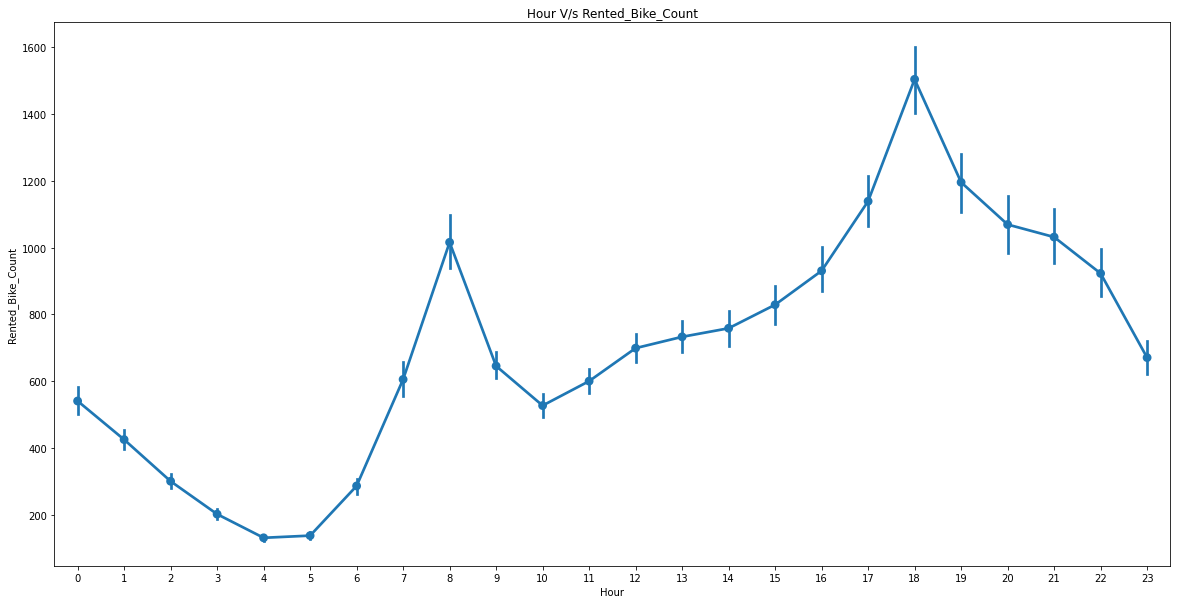

In [279]:

plt.figure(figsize=(20,10))
sns.pointplot(x=Data['Hour'],y=Data['Rented_Bike_Count'])
plt.title('Hour V/s Rented_Bike_Count')

##### 1. Why did you pick the specific chart?

Point Plot is similar to lineplot , but instead of showing the trend of the data, it shows the individual data points and their position relative to each other. By this we can find out for which hour the Rented Bikes count increasing and for which hour it is decreasing



##### 2. What is/are the insight(s) found from the chart?

From the above graph we can see that the bike rented are increasing from the Hour 6 to 8, which means the Bike rented are for office use . Then from Hour 16 to  18 the rented bike count is increasing again which is after the working hours for the offices.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the Business Impact is positive. By this we can say that the most number of Bikes getting rented in Peak Office Hour. 

#### Chart - 4

Text(0.5, 1.0, 'Rented Bike Count during different Seasons ')

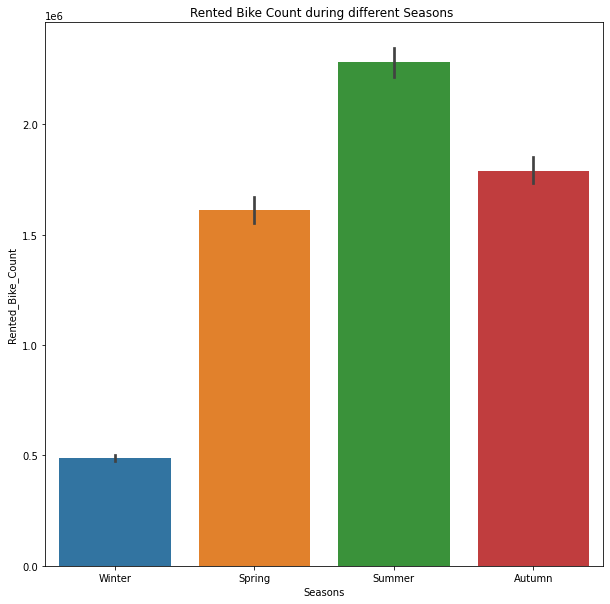

In [280]:
# Chart - 4 visualization code
plt.figure(figsize=(10,10))

sns.barplot(x=Data['Seasons'],y=Data['Rented_Bike_Count'],estimator=np.sum)
plt.title(f"Rented Bike Count during different Seasons ")




##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can say that in Season Summer the most number of bikes rented . And we can see that the Bike rented started increasing  from the season spring and it hit it's peak in Summer Season. Slightly decreased in Autumn and the hit the lowest in season winted.  

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights from the above has a positive business impact, Because we can see that the most number of bikes are rented in Summer , Autumn and Spring . For Winter People not rent the bike because of cold weather

#### Chart - 5

<Axes: xlabel='Temperature', ylabel='Dew_point_temperature'>

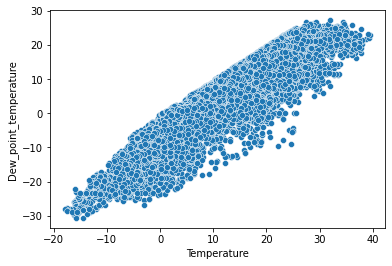

In [281]:
# Chart - 5 visualization code
sns.scatterplot(x=Data['Temperature'],y=Data['Dew_point_temperature'])

##### 1. Why did you pick the specific chart?

Scatterplot is used to obeserve the relation between two numerical variables, Also we can find the correlation between the features.

##### 2. What is/are the insight(s) found from the chart?

We can see there is the high positive  correlation between Dew_point_temperature and Temperature. 





##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The Bussiness Impact if positive from the above graph. Because with high correlation between these feature we can drop Dew_Point_Temperature from the DataFrame

#### Chart - 6

<Axes: xlabel='Temperature', ylabel='Humidity'>

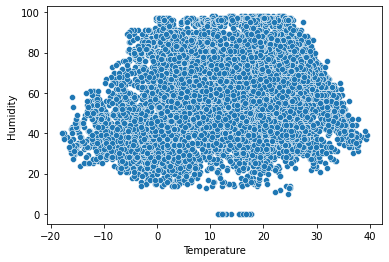

In [282]:
# Chart - 6 visualization code
sns.scatterplot(x=Data['Temperature'],y=Data['Humidity'])

##### 1. Why did you pick the specific chart?

Scatterplot is used to obeserve the relation between two numerical variables, Also we can find the correlation between the features.*italicized text*

##### 2. What is/are the insight(s) found from the chart?

From the above graph we can see that there are outliers present in the above graph which doesn;t fit the pattern.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Having outliers can impact the business neagatively, Because the outliers can be few in numbers but can impact the standatd deviation because of the very small or very large value.

#### Chart - 7

<Axes: xlabel='Hour', ylabel='Rented_Bike_Count'>

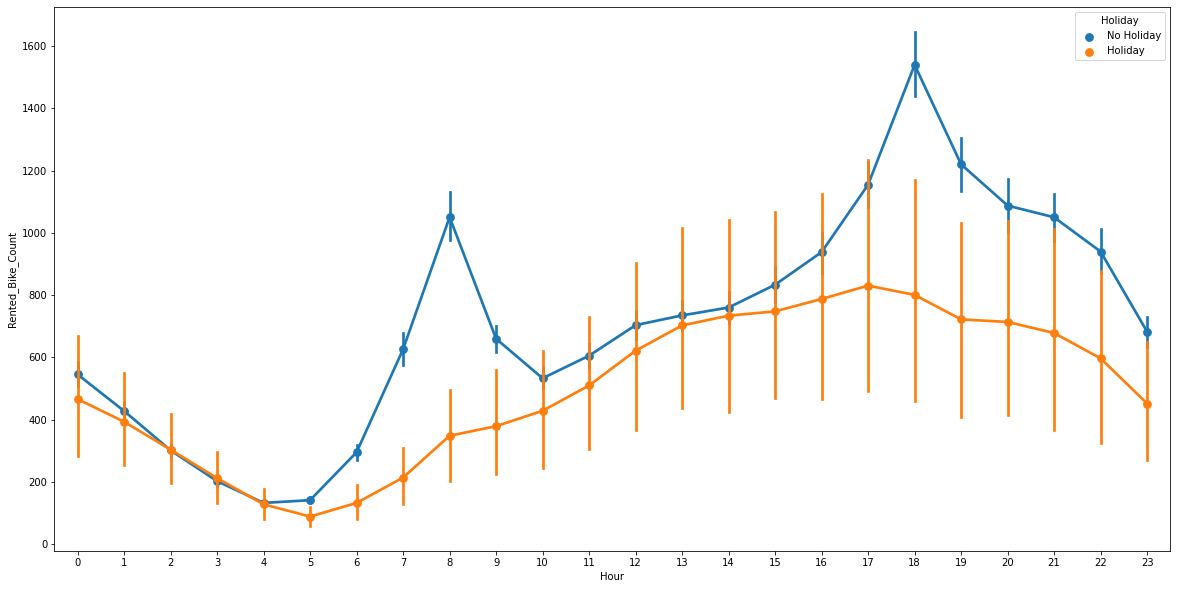

In [283]:
# Chart - 7 visualization code
plt.figure(figsize=(20,10))
sns.pointplot(data=Data,x='Hour',y='Rented_Bike_Count',hue='Holiday')

##### 1. Why did you pick the specific chart?

Point Plot is similar to lineplot , but instead of showing the trend of the data, it shows the individual data points and their position relative to each other. By this we can find out for which hour the Rented Bikes count increasing and for which hour it is decreasing

##### 2. What is/are the insight(s) found from the chart?

From the above graph we can say that the Bike Rental Count on Holiday is less for all hours and for Holiday the increase in Bike Rental if found at 8AM and it hit the peak on 17(7PM). On No Holiday  the bike rented are increasing from the Hour 6 to 8, which means the Bike rented are for office use . Then from Hour 16 to 18 the rented bike count is increasing again which is after the working hours for the offices.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The Bussiness Impact if negative from the above graph. We can say that on Holiday the bike rental is less with compared to No Holiday

#### Chart - 8

<Axes: xlabel='Hour', ylabel='Rented_Bike_Count'>

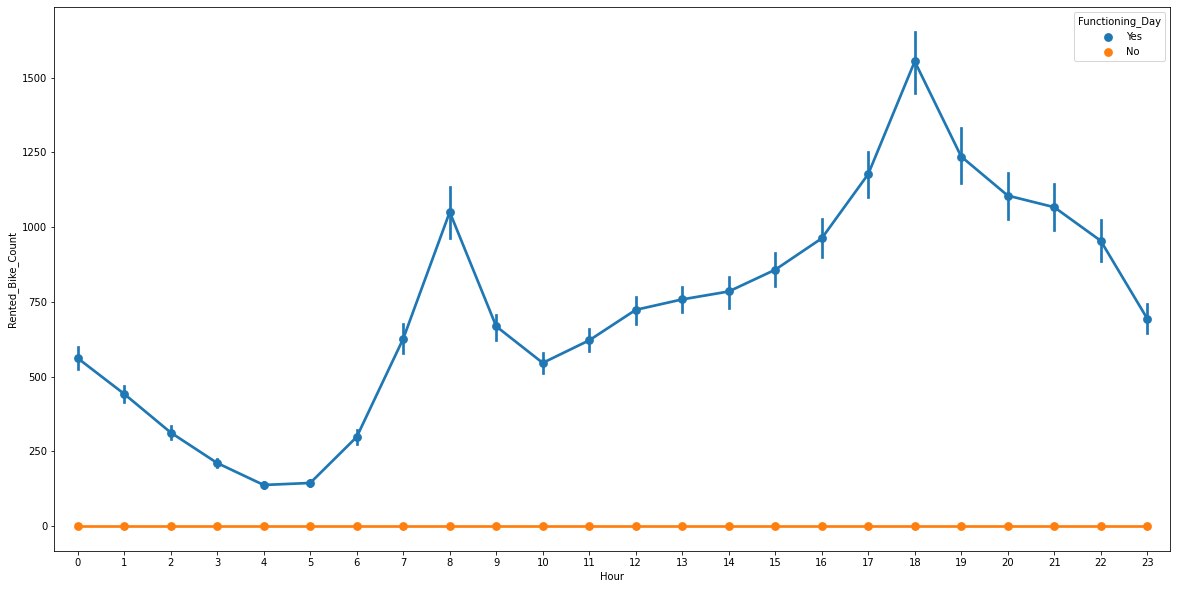

In [284]:
# Chart - 8 visualization code

plt.figure(figsize=(20,10))
sns.pointplot(data=Data,x='Hour',y='Rented_Bike_Count',hue='Functioning_Day')

##### 1. Why did you pick the specific chart?

Point Plot is similar to lineplot , but instead of showing the trend of the data, it shows the individual data points and their position relative to each other. By this we can find out for which hour the Rented Bikes count increasing and for which hour it is decreasing

##### 2. What is/are the insight(s) found from the chart?

From the above graph we can say that the Bike rental on non funtioning day is zero, which means no one rented the bike on Non Funtioning day. On Funtioning_Day the bike rented are increasing from the Hour 6 to 8, which means the Bike rented are for office use . Then from Hour 16 to 18 the rented bike count is increasing again which is after the working hours for the offices.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The Business impact from the above graph is negative . Because we can see that on Non Funtioning day people don't rent the bikes,But the count of Non Funtioning days is so small It might not impact that much for business".

#### Chart - 9

<Axes: xlabel='Hour', ylabel='Rented_Bike_Count'>

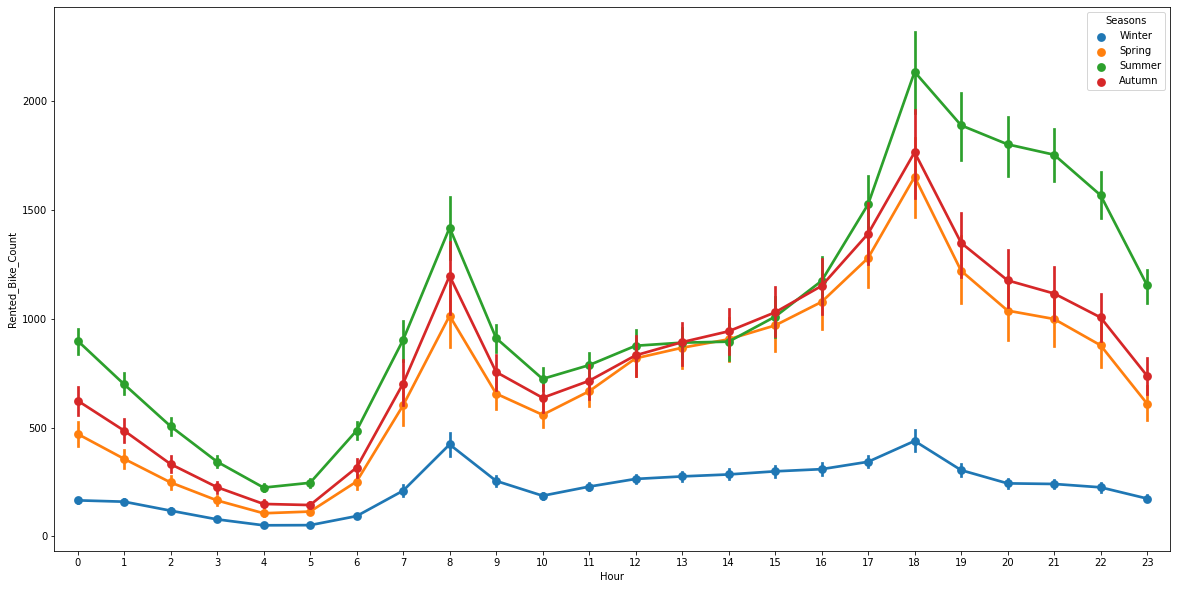

In [285]:
# Chart - 9 visualization code
plt.figure(figsize=(20,10))
sns.pointplot(data=Data,x='Hour',y='Rented_Bike_Count',hue='Seasons')

##### 1. Why did you pick the specific chart?

Point Plot is similar to lineplot , but instead of showing the trend of the data, it shows the individual data points and their position relative to each other. By this we can find out for which hour the Rented Bikes count increasing and for which hour it is decreasing

##### 2. What is/are the insight(s) found from the chart?

The pattern of Bike rental by hour is similar in all seasons . But we can say that very less number of people rent bikes in winter due to cold weather.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The Business impact is negative . Due to cold weather people rent less bike to avoid accidents .

#### Chart - 10

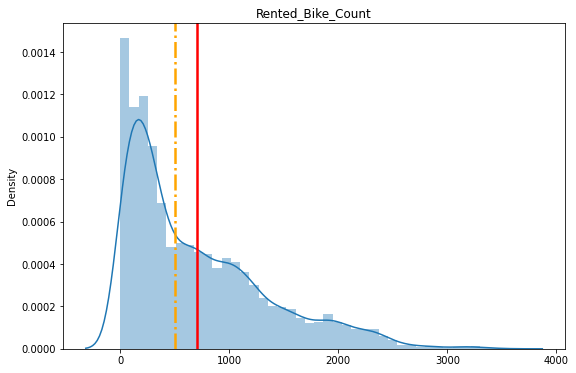

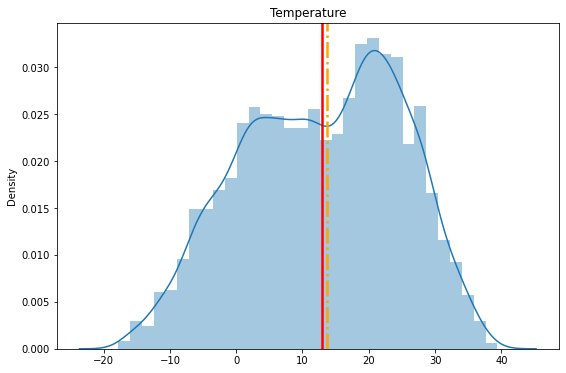

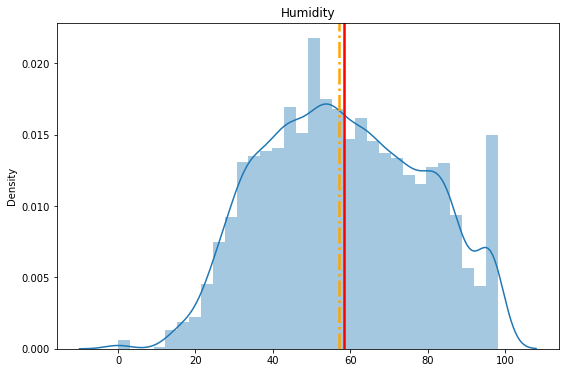

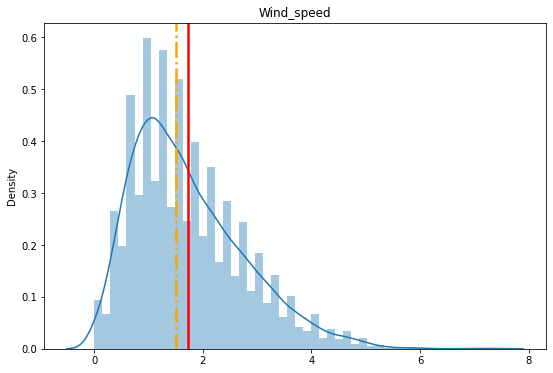

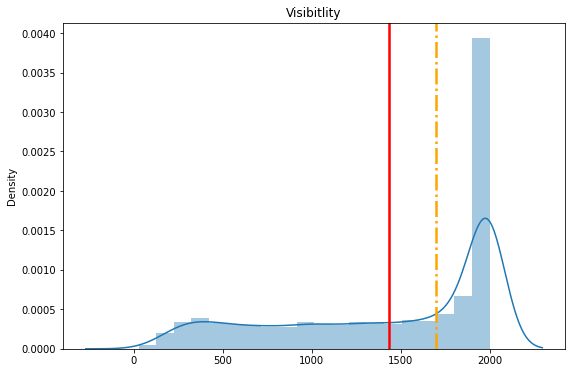

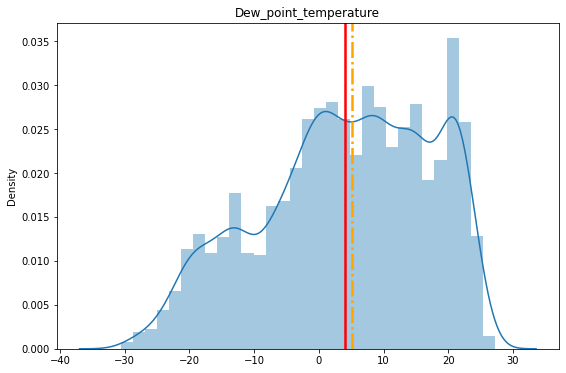

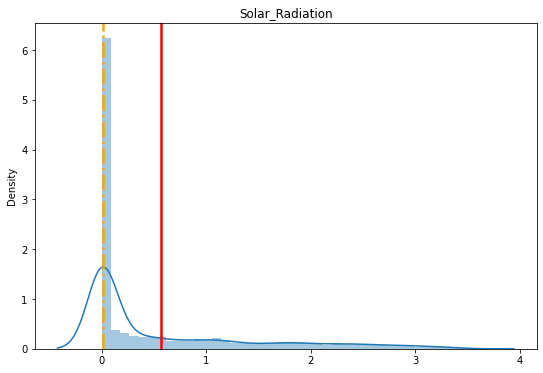

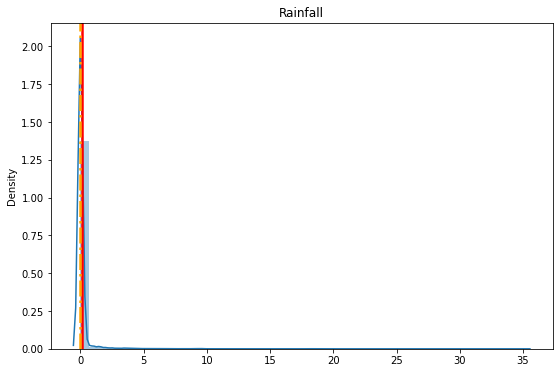

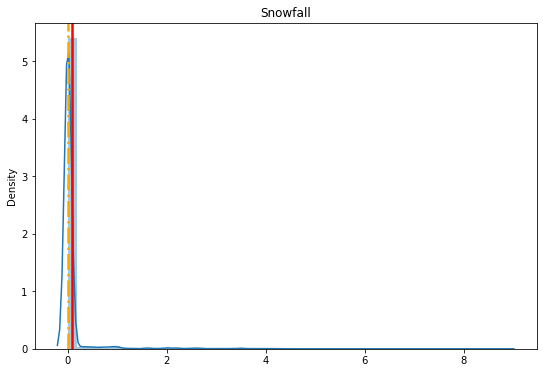

In [286]:
# Chart - 10 visualization code
for col in Continoues:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    sns.distplot(x=Data[col]).set(title=col)
    ax.axvline(x=Data[col].mean(), c='red', ls='-', lw=2.5)
    ax.axvline(x=Data[col].median(), c='orange', ls='dashdot', lw=2.5)

##### 1. Why did you pick the specific chart?

Distplot provides a quick and easy way to visualize the shape of the distribution .The resulting plot shows a histogram of the data and the Kernel Density estimate and provides a smooth density of the data.

##### 2. What is/are the insight(s) found from the chart?

In the plots we observed that some of our columns are right skewed and some are left skewed. We need to apply transformations for make skewness less.

**Right skewed features are**:Rented Bike Counts,Wind speed, Solar Radiation, Rainfall,Snowfall

**left skewed features are **: Visibility , Dew point temperature

For Rainfall,Snowfall and Solar Radiation most number of values are 0 .

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From the above graph the impact is Positvie. Because we need to transform data to make the distribution normal.


#### Chart - 11

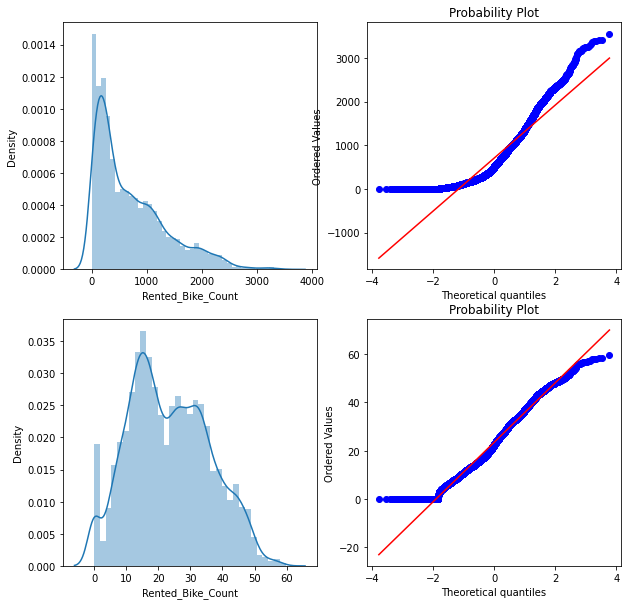

In [287]:
# Chart - 11 visualization code
import scipy.stats as stats

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(Data['Rented_Bike_Count'])

plt.subplot(2,2,2)
stats.probplot(Data['Rented_Bike_Count'], dist='norm',plot=plt,)

plt.subplot(2,2,3)
sns.distplot(np.sqrt(Data['Rented_Bike_Count']))
plt.subplot(2,2,4)
stats.probplot(np.sqrt(Data['Rented_Bike_Count']), dist='norm',plot=plt)
plt.show()



##### 1. Why did you pick the specific chart?

Distplot provides a quick and easy way to visualize the shape of the distribution .The resulting plot shows a histogram of the data and the Kernel Density estimate and provides a smooth density of the data.

Probplot says about how many values lie in a normal Distribution.

##### 2. What is/are the insight(s) found from the chart?

From the above graph we can say that after the square root trasformation of Rented_Bike_Count the distribution became normal from Left skewed. And by this more number of points are on the normal line

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We  got the positve Business impact from the above graphs , Becasue from it we can see more number of points are on normal line.




#### Chart - 12

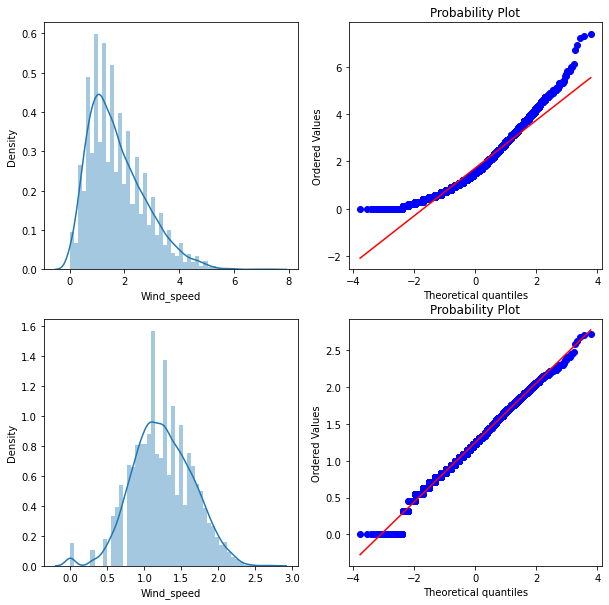

In [288]:
# Chart - 12 visualization code
import scipy.stats as stats

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(Data['Wind_speed'])

plt.subplot(2,2,2)
stats.probplot(Data['Wind_speed'], dist='norm',plot=plt,)

plt.subplot(2,2,3)
sns.distplot(np.sqrt(Data['Wind_speed']))
plt.subplot(2,2,4)
stats.probplot(np.sqrt(Data['Wind_speed']), dist='norm',plot=plt)
plt.show()

##### 1. Why did you pick the specific chart?

Distplot provides a quick and easy way to visualize the shape of the distribution .The resulting plot shows a histogram of the data and the Kernel Density estimate and provides a smooth density of the data.

Probplot says about how many values lie in a normal Distribution.

##### 2. What is/are the insight(s) found from the chart?

From the above graph we can say that after the square root trasformation of Wind_speed the distribution became normal from Left skewed. And by this more number of points are on the normal line

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We  got the positve Business impact from the above graphs , Becasue from it we can see more number of points are on normal line.

#### Chart - 13

<Axes: xlabel='Rented_Bike_Count', ylabel='Visibitlity'>

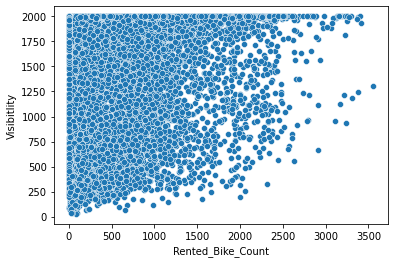

In [289]:
# Chart - 13 visualization code
sns.scatterplot(data=Data,x='Rented_Bike_Count',y='Visibitlity')

##### 1. Why did you pick the specific chart?

Scatterplot is used to obeserve the relation between two numerical variables, Also we can find the correlation between the features.

##### 2. What is/are the insight(s) found from the chart?

From the above graph I found that most points are on Zero and for Visibility the
the Max is 2000 and the more points are there at Visibility 2000





##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Having outliers can impact the business neagatively, Because the outliers can be few in numbers but can impact the standatd deviation because of the very small or very large value.

#### Chart - 14 - Correlation Heatmap

<Axes: >

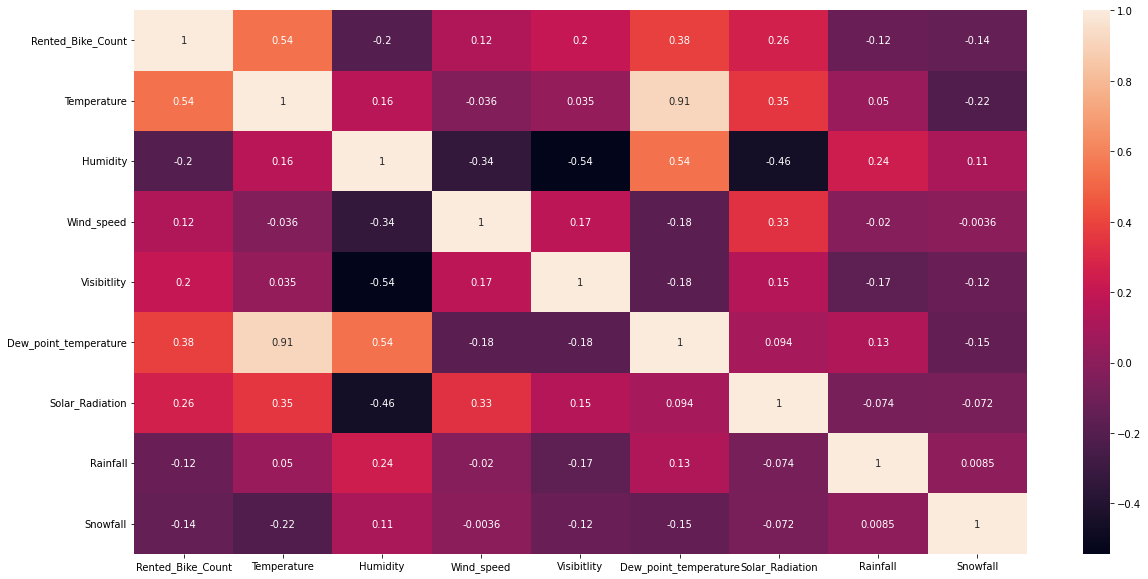

In [290]:
# Correlation Heatmap visualization code
plt.figure(figsize=(20,10))
sns.heatmap(Data[Continoues].corr(),annot=True)

##### 1. Why did you pick the specific chart?

Heatmap helps us to find the correlation between the numerical feature. So that we can drop one from highly correlated feature.

##### 2. What is/are the insight(s) found from the chart?

From the above plot we can say that Dew_point_temperatue and Temperature have high correlation of 91% so we drop one from them.
For the target variable feature temperature has high correlation of 54%.

#### Chart - 15 - Pair Plot 

<Figure size 1440x720 with 0 Axes>

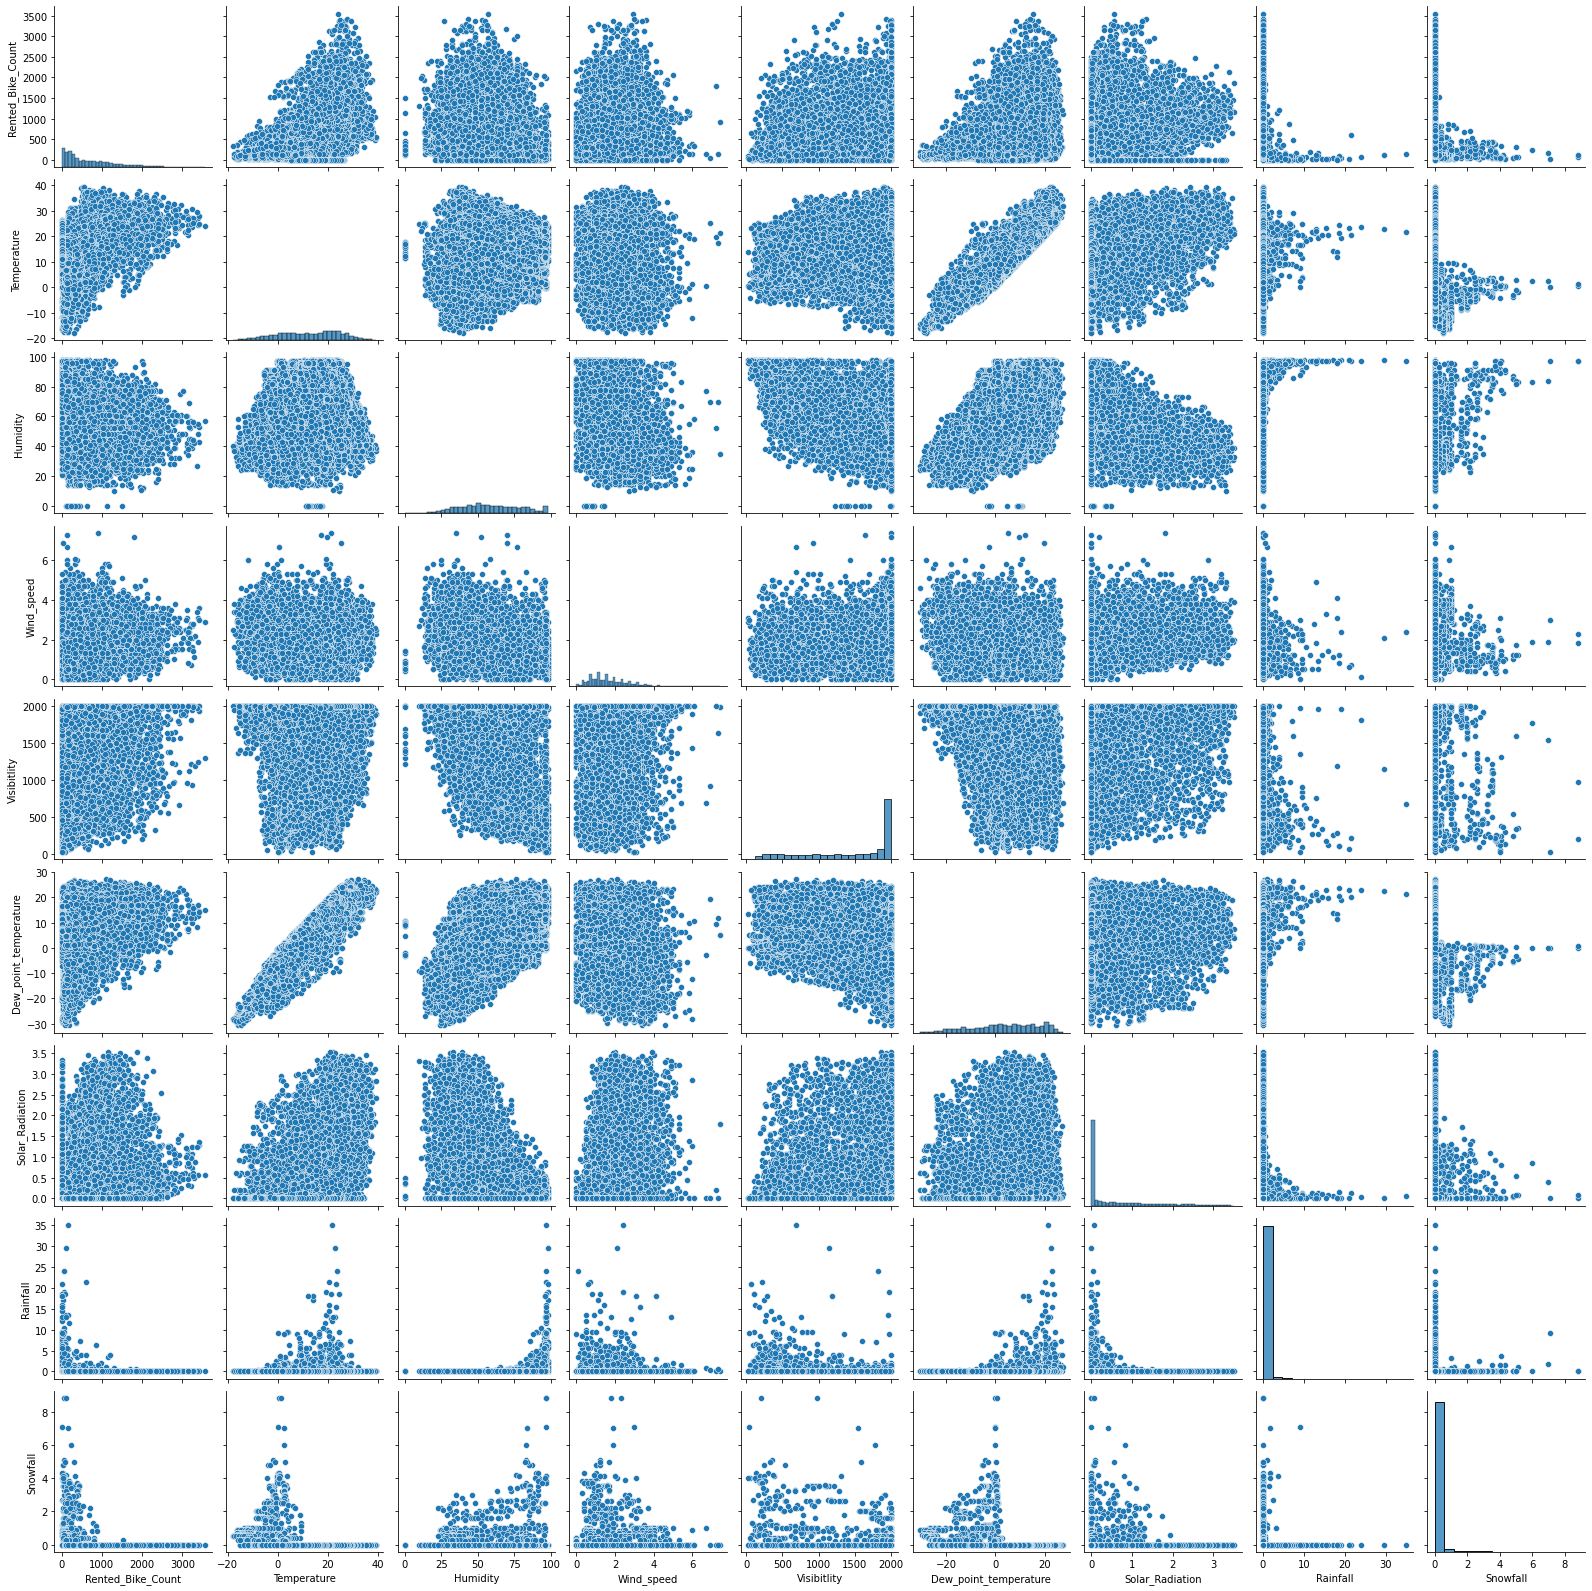

In [291]:
# Pair Plot visualization code
plt.figure(figsize=(20,10))
sns.pairplot(data=Data[Continoues])

##### 1. Why did you pick the specific chart?

By plotting all possible pairs of variables, we can easily see how different variables are related to one another. It helps in Identifying Outliers for all pairs



##### 2. What is/are the insight(s) found from the chart?

From the graph we can say that there is high positive correlation between the Temperature and Dew_point Temperature.
For Snowfall rainfall and Solar_Radiation the most values are 0




## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Hypothesis test to determine if the mean bike rental count is significantly different between weekdays and weekends:**

**Null Hypothesis (H0):** There is no significant difference in the mean bike rental count between weekdays and weekends.

**Alternative Hypothesis (HA):** The mean bike rental count is significantly different between weekdays and weekends.



#### 2. Perform an appropriate statistical test.

In [292]:
# Perform Statistical Test to obtain P-Value
import pandas as pd
from scipy.stats import ttest_ind
# 
alpha=0.05
# Convert Date feature type to Datetime

# Create a new column for day of week
Data['weekday'] = Data['Date'].dt.dayofweek

# Split the dataset into weekdays and weekends
weekdays = Data[Data['weekday'] < 5]['Rented_Bike_Count']
weekends = Data[Data['weekday'] >= 5]['Rented_Bike_Count']

# Perform two-sample t-test
t_stat, p_value = ttest_ind(weekdays, weekends)
if p_value<alpha:
  print("We  reject the null hypothesis and conclude that the mean bike rental counts are significantly different between weekdays and weekends.")
else:
  print("We failed to reject the null hypothesis and conclude that there is no significant difference between the means two groups.")
# Print the results

print('T-statistic: ', t_stat)
print('P-value: ', p_value)

We  reject the null hypothesis and conclude that the mean bike rental counts are significantly different between weekdays and weekends.
T-statistic:  3.0205383403487915
P-value:  0.002530536351376408


##### Which statistical test have you done to obtain P-Value?

I had done T-Test to obtain the P-Value

##### Why did you choose the specific statistical test?

T-test is used to compare the difference between the two groups of Data. Like for comparing the means of Rented_Bike_Count for group  Weekday and Weekend

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Hypothesis test to determine if there is a significant correlation between temperature and bike rental count:**

**Null Hypothesis (H0)**: There is no significant correlation between temperature and bike rental count.

**Alternative Hypothesis (HA)**: There is a significant correlation between temperature and bike rental count.

#### 2. Perform an appropriate statistical test.

In [293]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(Data['Temperature'], Data['Rented_Bike_Count'])

# Print the results
if p_value < alpha:
    print('Reject Null Hypothesis. There is a significant correlation between temperature and bike rental count.')
else:
    print('Fail to reject Null Hypothesis. There is no significant correlation between temperature and bike rental count.')
print('Correlation coefficient:', corr)
print('P-value:', p_value)

Reject Null Hypothesis. There is a significant correlation between temperature and bike rental count.
Correlation coefficient: 0.5385581530139791
P-value: 0.0


##### Which statistical test have you done to obtain P-Value?

I used the Personr test to Obtain P-Value

##### Why did you choose the specific statistical test?

Pearsonr test is used to find the correlation between temperature and Rented_Bike_Count.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Hypothesis test to determine if the mean bike rental count is significantly different between different seasons:**

**Null Hypothesis (H0):** There is no significant difference in the mean bike rental count between different seasons.

**Alternative Hypothesis (HA):** The mean bike rental count is significantly different between different seasons.

#### 2. Perform an appropriate statistical test.

In [294]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import f_oneway
annova_array=[]
for i in Data['Seasons'].unique():
  annova_array.append(Data[Data['Seasons']==i]['Rented_Bike_Count'])
annova_array
f,p_value=f_oneway(*annova_array)
if p_value < alpha:
    print('Reject Null Hypothesis. The mean bike rental count is significantly different between different seasons.')
else:
    print('Fail to reject Null Hypothesis. The mean bike rental count is not significantly different between different seasons.')


Reject Null Hypothesis. The mean bike rental count is significantly different between different seasons.


##### Which statistical test have you done to obtain P-Value?

I used One Way Anova to obtain P-Value

##### Why did you choose the specific statistical test?

It is used to analyze the variance between independent and dependent features and find the singnificant difference in different seasons groups.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [295]:
# Handling Missing Values & Missing Value Imputation
Data.isnull().sum()

Date                     0
Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibitlity              0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
Day                      0
Month                    0
Year                     0
weekday                  0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Found No Null Values

### 2. Handling Outliers

<Axes: >

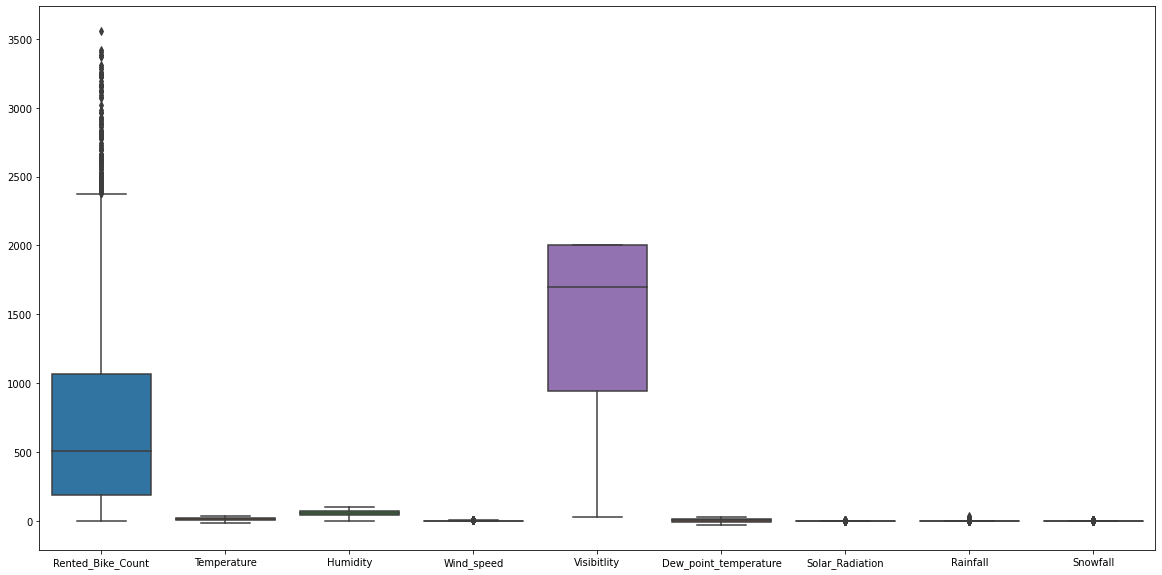

In [296]:
# Handling Outliers & Outlier treatmentsD
plt.figure(figsize=(20,10))
sns.boxplot(data=Data[Continoues])

In [297]:
def outlier_capping(data):
  # calculate the first and third quartiles of the Data
  Q1=np.quantile(data,0.25)
  Q3=np.quantile(data,0.75)
  # calculate the Interquartile range
  Iqr=Q3-Q1
  # calculate the lower and upper bounds for the outliers

  lower_bound=Q1-1.5*Iqr
  upper_bound=Q3+1.5*Iqr

  # Data without outliers
  cleaned_data=[]
  for i in data:
    if i < lower_bound:
      cleaned_data.append(lower_bound)
    elif i > upper_bound:
      cleaned_data.append(upper_bound)
    else:
      cleaned_data.append(i)
  return cleaned_data

Data['Rented_Bike_Count']=outlier_capping(Data['Rented_Bike_Count'])


<Axes: >

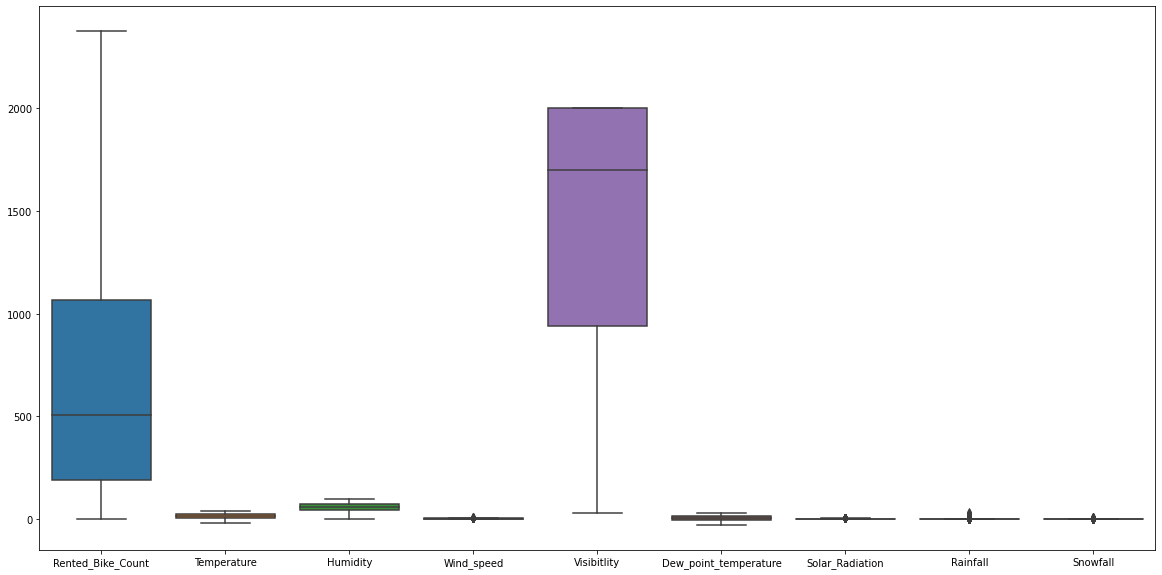

In [298]:
plt.figure(figsize=(20,10))
sns.boxplot(data=Data[Continoues])

##### What all outlier treatment techniques have you used and why did you use those techniques?

We used Outlier capping to remove the outliers, Because this technique caps the Outliers Greater than Upper_bound with upper bound and Outliers Less than Lower Bound with lower bound

### 3. Categorical Encoding

In [299]:
# Encode your categorical columns
from sklearn.preprocessing import LabelEncoder

encoded_data= Data.apply(LabelEncoder().fit_transform)
encoded_data.head()


,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibitlity,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Day,Month,Year,weekday
0,0,253,0,111,28,22,1788,114,0,0,0,3,1,1,11,0,0,3
1,0,203,1,108,29,8,1788,114,0,0,0,3,1,1,11,0,0,3
2,0,172,2,103,30,10,1788,113,0,0,0,3,1,1,11,0,0,3
3,0,106,3,101,31,9,1788,114,0,0,0,3,1,1,11,0,0,3
4,0,77,4,103,27,23,1788,104,0,0,0,3,1,1,11,0,0,3


#### What all categorical encoding techniques have you used & why did you use those techniques?

I used Label Encoder for encoding the categorical .Because when there are only two possible values of a categorical features. 

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [300]:
# Expand Contraction

#### 2. Lower Casing

In [301]:
# Lower Casing

#### 3. Removing Punctuations

In [302]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [303]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [304]:
# Remove Stopwords

In [305]:
# Remove White spaces

#### 6. Rephrase Text

In [306]:
# Rephrase Text

#### 7. Tokenization

In [307]:
# Tokenization

#### 8. Text Normalization

In [308]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [309]:
# POS Taging

#### 10. Text Vectorization

In [310]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [311]:
# Manip/ulate Features to minimize feature correlation and create new features
encoded_data.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibitlity,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Day,Month,Year,weekday
0,0,253,0,111,28,22,1788,114,0,0,0,3,1,1,11,0,0,3
1,0,203,1,108,29,8,1788,114,0,0,0,3,1,1,11,0,0,3
2,0,172,2,103,30,10,1788,113,0,0,0,3,1,1,11,0,0,3
3,0,106,3,101,31,9,1788,114,0,0,0,3,1,1,11,0,0,3
4,0,77,4,103,27,23,1788,104,0,0,0,3,1,1,11,0,0,3


In [312]:

# Let's Drop Date and Dew_point_temperature
encoded_data.drop(columns=['Date','Dew_point_temperature','weekday'],axis=1,inplace=True)



#### 2. Feature Selection

<Axes: >

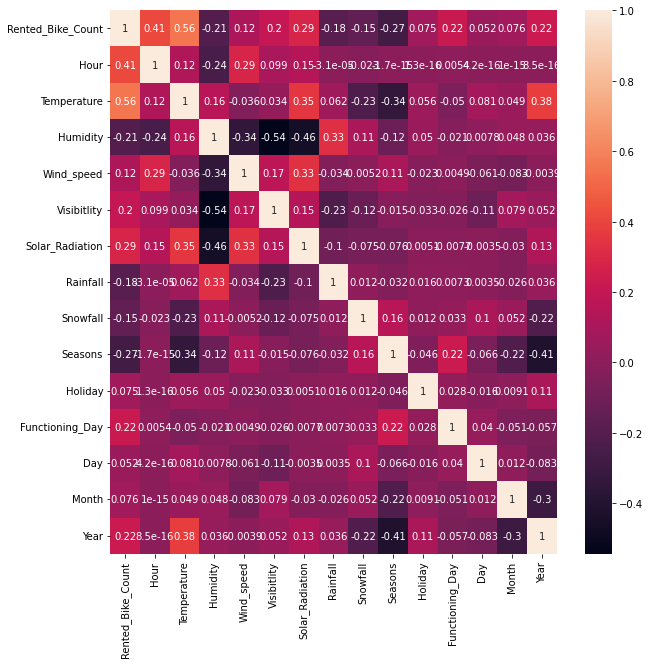

In [313]:
# Select your features wisely to avoid overfitting

#Multicollinearity
plt.figure(figsize=(10,10))
sns.heatmap(encoded_data.corr(),annot=True)


##### What all feature selection methods have you used  and why?

we have less feature so we are slecting all features above

##### Which all features you found important and why?

Temperature and Hour have the high correlartion with Rented_Bike_Count. So I found they are important

### 5. Data Transformation

In [314]:
encoded_data['Rented_Bike_Count']=np.sqrt(encoded_data['Rented_Bike_Count'])
encoded_data['Wind_speed']=np.sqrt(encoded_data['Wind_speed'])

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?
Yes we need to transform data, The Transformation for Rented_Bike_Count and WindWind_Speed is need because the are skewed . To make them normal distribution we used square root transformation.

### 6. Data Scaling

In [315]:
# Scaling your data
X=encoded_data.drop(['Rented_Bike_Count'],axis=1)
Y=encoded_data['Rented_Bike_Count']
X.head()

,Hour,Temperature,Humidity,Wind_speed,Visibitlity,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Day,Month,Year
0,0,111,28,4.690416,1788,0,0,0,3,1,1,11,0,0
1,1,108,29,2.828427,1788,0,0,0,3,1,1,11,0,0
2,2,103,30,3.162278,1788,0,0,0,3,1,1,11,0,0
3,3,101,31,3.000000,1788,0,0,0,3,1,1,11,0,0
4,4,103,27,4.795832,1788,0,0,0,3,1,1,11,0,0


### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

No , dimensionality reduction not needed because we have less number of feature .

In [316]:
# DImensionality Reduction (If needed)


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)


### 8. Data Splitting

In [317]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.preprocessing import MinMaxScaler
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
X_test,X_val,Y_test,Y_val=train_test_split(X_train,Y_train,test_size=0.1,random_state=42)
Scaler = MinMaxScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)
X_val=Scaler.transform(X_val)


##### Which method have you used to scale you data and why?

We use MinMaxScaler to scale the features of a dataset to a specific range, usually between 0 and 1.MinMaxScaler is particularly useful when the features of the dataset have different scales or units, as it can help to make them comparable and ensure that no single feature dominates the others in the learning process. 

##### What data splitting ratio have you used and why? 

The Ratio of train : test :val is 70:20:10, we used this ratio so that model can train form 70% data and avoid overfitting.





### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [318]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [319]:
# ML Model - 1 Implementation
result_Df=pd.DataFrame()
rf=RandomForestRegressor(n_estimators=100)

# Fit the Algorithm
rf.fit(X_train,Y_train)

# Predict on the model
y_predict_train=rf.predict(X_train)
y_predict_test=rf.predict(X_test)
result_dict={
    'Model':'RandomForestRegressor',
    'Train_MAE':mean_absolute_error(y_predict_train,Y_train),
    'Train_MSE':mean_squared_error(y_predict_train,Y_train),
    'Train_RMSE':np.sqrt(mean_squared_error(y_predict_train,Y_train)),
    'Train_r2_score':r2_score(y_predict_train,Y_train),
    'Test_MAE':mean_absolute_error(y_predict_test,Y_test),
    'Test_MSE':mean_squared_error(y_predict_test,Y_test),
    'Test_RMSE':np.sqrt(mean_squared_error(y_predict_test,Y_test)),
    'Test_r2_score':r2_score(y_predict_test,Y_test)

}




result_Df=result_Df.append(result_dict,ignore_index=True)
result_Df

,Model,Train_MAE,Train_MSE,Train_RMSE,Train_r2_score,Test_MAE,Test_MSE,Test_RMSE,Test_r2_score
0,RandomForestRegressor,0.882808,1.820813,1.349375,0.986161,0.884235,1.810444,1.345527,0.986147


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

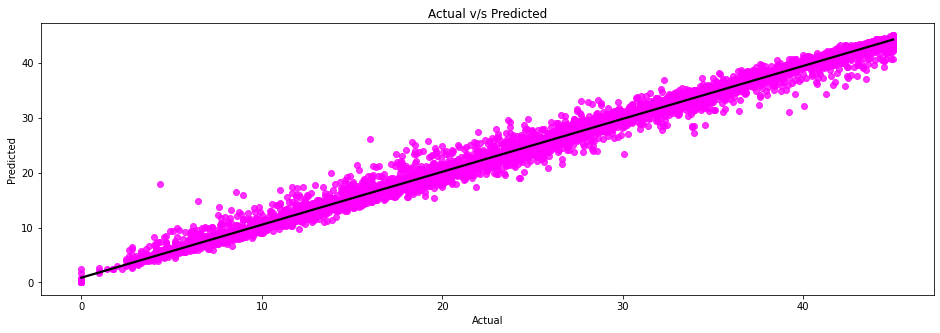

In [320]:
# Visualizing evaluation Metric Score chart
def plot_scatter(y_pred,y_test):
  '''Plot scatter plot for y_test values and 
  y_test values. To check how close we are to regresson line'''
  plt.figure(figsize=(16,5))
  sns.regplot(x=y_test,y=y_pred,scatter_kws={'color':'magenta'},line_kws={'color':'black'})
  plt.xlabel('Actual')
  plt.ylabel("Predicted")
  plt.title("Actual v/s Predicted")


plot_scatter(y_predict_test,Y_test)

#### 2. Cross- Validation & Hyperparameter Tuning

In [321]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV
param={'n_estimators':[25,50,40,80,100],'max_depth':[3,4,5,6,7,8,9]}
# Esitmator model
rf_reg=RandomForestRegressor()
# Declare the GridSearchCV model
rf_tuning=GridSearchCV(rf_reg,param_grid=param,scoring='neg_mean_squared_error',cv=5)
# fit the algorithm
rf_tuning.fit(X_train,Y_train)
rf_tuning.best_params_



{'max_depth': 9, 'n_estimators': 100}

In [322]:

rf_tunned=RandomForestRegressor(n_estimators=rf_tuning.best_params_['n_estimators'],max_depth=rf_tuning.best_params_['max_depth'],criterion='friedman_mse')

# Fit the Algorithm
rf_tunned.fit(X_train,Y_train)
# Predict on the model
y_predict_train=rf_tunned.predict(X_train)
y_predict_test=rf_tunned.predict(X_test)

result_dict={
    'Model':'RandomForestRegressor_GridSearchCV',
    'Train_MAE':mean_absolute_error(y_predict_train,Y_train),
    'Train_MSE':mean_squared_error(y_predict_train,Y_train),
    'Train_RMSE':np.sqrt(mean_squared_error(y_predict_train,Y_train)),
    'Train_r2_score':r2_score(y_predict_train,Y_train),
    'Test_MAE':mean_absolute_error(y_predict_test,Y_test),
    'Test_MSE':mean_squared_error(y_predict_test,Y_test),
    'Test_RMSE':np.sqrt(mean_squared_error(y_predict_test,Y_test)),
    'Test_r2_score':r2_score(y_predict_test,Y_test)

}

result_Df=result_Df.append(result_dict,ignore_index=True)
result_Df

,Model,Train_MAE,Train_MSE,Train_RMSE,Train_r2_score,Test_MAE,Test_MSE,Test_RMSE,Test_r2_score
0,RandomForestRegressor,0.882808,1.820813,1.349375,0.986161,0.884235,1.810444,1.345527,0.986147
1,RandomForestRegressor_GridSearchCV,2.326555,10.909622,3.302972,0.910225,2.325300,10.889907,3.299986,0.910059


Text(0.5, 0, 'Relative Importance')

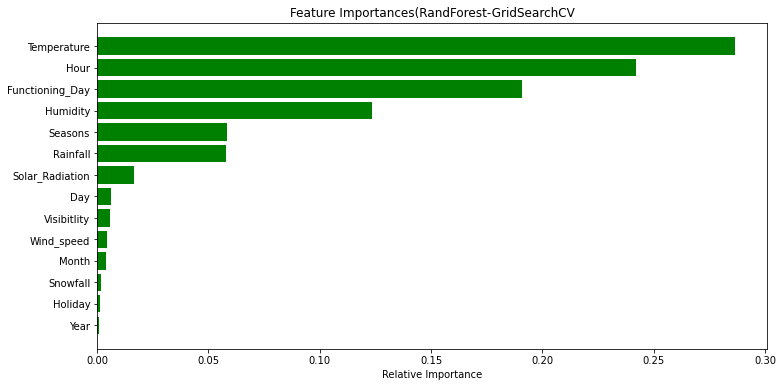

In [323]:
imp_variables=X.columns
importances = rf_tunned.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,6))
plt.title('Feature Importances(RandForest-GridSearchCV')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), imp_variables[indices])
plt.xlabel('Relative Importance')

##### Which hyperparameter optimization technique have you used and why?

We used GridSearchCV.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [324]:
from sklearn.tree import DecisionTreeRegressor
# ML Model - 2 Implementation

D_tree=DecisionTreeRegressor(max_depth=5)
# Fit the Algorithm

D_tree.fit(X_train,Y_train)
# Predict on the model

y_predict_train=D_tree.predict(X_train)
y_predict_test=D_tree.predict(X_test)

result_dict={
    'Model':'DecisionTreeRegressor',
    'Train_MAE':mean_absolute_error(y_predict_train,Y_train),
    'Train_MSE':mean_squared_error(y_predict_train,Y_train),
    'Train_RMSE':np.sqrt(mean_squared_error(y_predict_train,Y_train)),
    'Train_r2_score':r2_score(y_predict_train,Y_train),
    'Test_MAE':mean_absolute_error(y_predict_test,Y_test),
    'Test_MSE':mean_squared_error(y_predict_test,Y_test),
    'Test_RMSE':np.sqrt(mean_squared_error(y_predict_test,Y_test)),
    'Test_r2_score':r2_score(y_predict_test,Y_test)

}
result_Df=result_Df.append(result_dict,ignore_index=True)
result_Df


,Model,Train_MAE,Train_MSE,Train_RMSE,Train_r2_score,Test_MAE,Test_MSE,Test_RMSE,Test_r2_score
0,RandomForestRegressor,0.882808,1.820813,1.349375,0.986161,0.884235,1.810444,1.345527,0.986147
1,RandomForestRegressor_GridSearchCV,2.326555,10.909622,3.302972,0.910225,2.325300,10.889907,3.299986,0.910059
2,DecisionTreeRegressor,3.863391,27.805808,5.273121,0.752288,3.856199,27.460901,5.240315,0.755285


#### 2. Cross- Validation & Hyperparameter Tuning

In [325]:
from sklearn.model_selection  import GridSearchCV

tree=DecisionTreeRegressor()
parameters={
            "splitter":["best","random"],
            "max_depth" : [3,5,7,9,None],
           "max_features":["auto","log2"] }
# Fit the Algorithm
tuning_model=GridSearchCV(tree,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=0)
tuning_model.fit(X_train,Y_train)
# Predict on the model
tuning_model.best_estimator_

DecisionTreeRegressor(max_depth=9, max_features='auto')

In [326]:
from sklearn.tree import DecisionTreeRegressor
# ML Model - 2 Implementation

D_tree_tunned=DecisionTreeRegressor(max_depth=tuning_model.best_estimator_['max_depth'],splitter='best',max_features='auto',criterion='friedman_mse')
# Fit the Algorithm
D_tree_tunned.fit(X_train,Y_train)
y_predict_train=D_tree_tunned.predict(X_train)
y_predict_test=D_tree_tunned.predict(X_test)
result_dict={
    'Model':'DTree_GridSearchCV',
    'Train_MAE':mean_absolute_error(y_predict_train,Y_train),
    'Train_MSE':mean_squared_error(y_predict_train,Y_train),
    'Train_RMSE':np.sqrt(mean_squared_error(y_predict_train,Y_train)),
    'Train_r2_score':r2_score(y_predict_train,Y_train),
    'Test_MAE':mean_absolute_error(y_predict_test,Y_test),
    'Test_MSE':mean_squared_error(y_predict_test,Y_test),
    'Test_RMSE':np.sqrt(mean_squared_error(y_predict_test,Y_test)),
    'Test_r2_score':r2_score(y_predict_test,Y_test)

}
result_Df=result_Df.append(result_dict,ignore_index=True)
result_Df


,Model,Train_MAE,Train_MSE,Train_RMSE,Train_r2_score,Test_MAE,Test_MSE,Test_RMSE,Test_r2_score
0,RandomForestRegressor,0.882808,1.820813,1.349375,0.986161,0.884235,1.810444,1.345527,0.986147
1,RandomForestRegressor_GridSearchCV,2.326555,10.909622,3.302972,0.910225,2.325300,10.889907,3.299986,0.910059
2,DecisionTreeRegressor,3.863391,27.805808,5.273121,0.752288,3.856199,27.460901,5.240315,0.755285
3,DTree_GridSearchCV,2.496921,13.193101,3.632231,0.896005,2.492324,13.213283,3.635008,0.895468


Text(0.5, 0, 'Relative Importance')

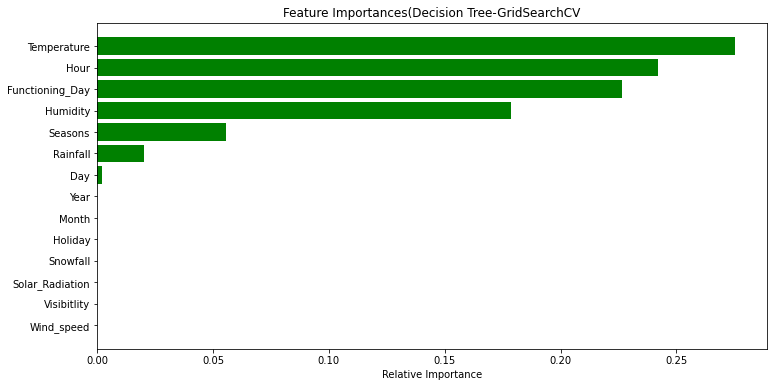

In [327]:
imp_variables=X.columns
importances = D_tree.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,6))
plt.title('Feature Importances(Decision Tree-GridSearchCV')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), imp_variables[indices])
plt.xlabel('Relative Importance')

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [328]:
# ML Model - 3 Implementation

from sklearn.ensemble import GradientBoostingRegressor

gradboo_reg=GradientBoostingRegressor()

# Fit the Algorithm
gradboo_reg.fit(X_train,Y_train)

# Predict on the model
y_predict_train=gradboo_reg.predict(X_train)
y_predict_test=gradboo_reg.predict(X_test)





#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [329]:
result_dict={
    'Model':'GBRegressor',
    'Train_MAE':mean_absolute_error(y_predict_train,Y_train),
    'Train_MSE':mean_squared_error(y_predict_train,Y_train),
    'Train_RMSE':np.sqrt(mean_squared_error(y_predict_train,Y_train)),
    'Train_r2_score':r2_score(y_predict_train,Y_train),
    'Test_MAE':mean_absolute_error(y_predict_test,Y_test),
    'Test_MSE':mean_squared_error(y_predict_test,Y_test),
    'Test_RMSE':np.sqrt(mean_squared_error(y_predict_test,Y_test)),
    'Test_r2_score':r2_score(y_predict_test,Y_test)

}
result_Df=result_Df.append(result_dict,ignore_index=True)
result_Df

,Model,Train_MAE,Train_MSE,Train_RMSE,Train_r2_score,Test_MAE,Test_MSE,Test_RMSE,Test_r2_score
0,RandomForestRegressor,0.882808,1.820813,1.349375,0.986161,0.884235,1.810444,1.345527,0.986147
1,RandomForestRegressor_GridSearchCV,2.326555,10.909622,3.302972,0.910225,2.325300,10.889907,3.299986,0.910059
2,DecisionTreeRegressor,3.863391,27.805808,5.273121,0.752288,3.856199,27.460901,5.240315,0.755285
3,DTree_GridSearchCV,2.496921,13.193101,3.632231,0.896005,2.492324,13.213283,3.635008,0.895468
4,GBRegressor,2.781754,14.740360,3.839318,0.871432,2.773930,14.559021,3.815629,0.872755


#### 2. Cross- Validation & Hyperparameter Tuning

In [330]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
gbr=GradientBoostingRegressor()
     

parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [50,80,100,150],
                  'max_depth'    : [4,6,8,10]
                 }

# Fit the Algorithm
grad_boo_tuning=GridSearchCV(gbr,param_grid=parameters,cv=4,n_jobs=1)
# fitting gridsearc on xtrain and ytrain
grad_boo_tuning.fit(X_train,Y_train)
grad_boo_tuning.best_params_




{'learning_rate': 0.04, 'max_depth': 10, 'n_estimators': 150, 'subsample': 0.5}

In [331]:
gbr_tunned=GradientBoostingRegressor(learning_rate= grad_boo_tuning.best_params_['learning_rate'], max_depth= grad_boo_tuning.best_params_['max_depth'], n_estimators=grad_boo_tuning.best_params_
['n_estimators'], subsample= grad_boo_tuning.best_params_['subsample'],criterion='friedman_mse')
gbr_tunned.fit(X_train,Y_train)
y_predict_train=gbr_tunned.predict(X_train)
y_predict_test=gbr_tunned.predict(X_test)
result_dict={
    'Model':'GBRegressor_GridSearchCV',
    'Train_MAE':mean_absolute_error(y_predict_train,Y_train),
    'Train_MSE':mean_squared_error(y_predict_train,Y_train),
    'Train_RMSE':np.sqrt(mean_squared_error(y_predict_train,Y_train)),
    'Train_r2_score':r2_score(y_predict_train,Y_train),
    'Test_MAE':mean_absolute_error(y_predict_test,Y_test),
    'Test_MSE':mean_squared_error(y_predict_test,Y_test),
    'Test_RMSE':np.sqrt(mean_squared_error(y_predict_test,Y_test)),
    'Test_r2_score':r2_score(y_predict_test,Y_test)

}
result_Df=result_Df.append(result_dict,ignore_index=True)
result_Df


,Model,Train_MAE,Train_MSE,Train_RMSE,Train_r2_score,Test_MAE,Test_MSE,Test_RMSE,Test_r2_score
0,RandomForestRegressor,0.882808,1.820813,1.349375,0.986161,0.884235,1.810444,1.345527,0.986147
1,RandomForestRegressor_GridSearchCV,2.326555,10.909622,3.302972,0.910225,2.325300,10.889907,3.299986,0.910059
2,DecisionTreeRegressor,3.863391,27.805808,5.273121,0.752288,3.856199,27.460901,5.240315,0.755285
3,DTree_GridSearchCV,2.496921,13.193101,3.632231,0.896005,2.492324,13.213283,3.635008,0.895468
4,GBRegressor,2.781754,14.740360,3.839318,0.871432,2.773930,14.559021,3.815629,0.872755
5,GBRegressor_GridSearchCV,0.945141,1.649354,1.284272,0.987571,0.948905,1.661981,1.289179,0.987398


The RandomForestRegresor has the Train and test r2_score of 0.91 and 0.91 but the Train RMSE and Test RMSE are 3.3 & 3.2 respectively.The DecisionTreeRegressor has the Train and test r2_score of 0.89and 0.89 but the Train RMSE and Test RMSE are 3.6 & 3.6 respectively.The GradientBoostingRegressor has the Train and test r2_score of 0.98and 0.98 but the Train RMSE and Test RMSE are 1.2& 1.2  respectively. The Best model is GradientBoostingRegressor it gave the R2_Score on the Unseen Data X_val as well.


Text(0.5, 0, 'Relative Importance')

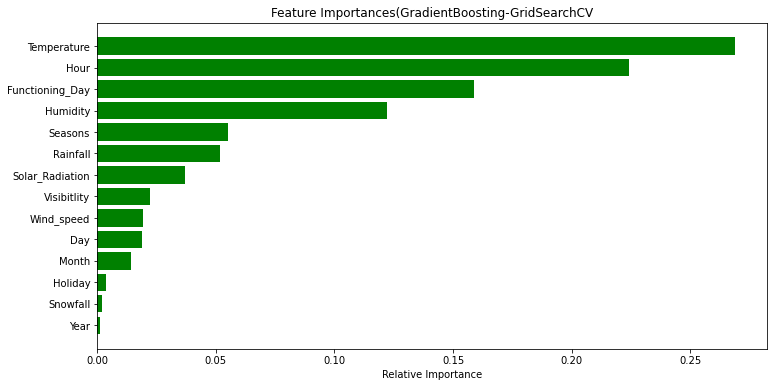

In [332]:
imp_variables=X.columns
importances = gbr_tunned.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,6))
plt.title('Feature Importances(GradientBoosting-GridSearchCV')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), imp_variables[indices])
plt.xlabel('Relative Importance')

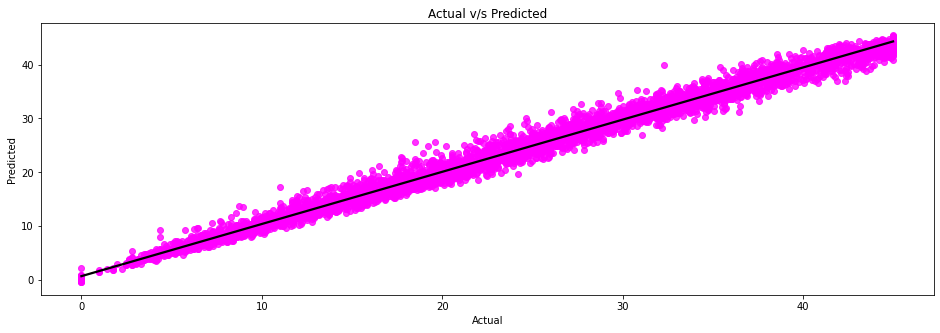

In [333]:
plot_scatter(y_predict_test,Y_test)

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

We are considering r2_score and RMSE as the Evaluation metrics. 

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

We are choosing the GradientBoostRegression model as our final Predict model because it has best r2_score for train (0.98) and test (0.98) and RMSE for train(1.29) and test (1.28). 

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Temperature and Hour has more importance for the Final Model in above feature importance Graph

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [334]:
# Save the File
import pickle
with open('model_pkl', 'wb') as files:
    pickle.dump(gbr_tunned, files)

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [335]:
# Load the File and predict unseen data.

In [336]:
with open('model_pkl' , 'rb') as f:
    lr = pickle.load(f)
# check prediction
lr.score(X_val,Y_val)


0.9896674592199812

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

**EDA insights:**

1. Bikes are leased out most frequently in the summer and least frequently in the winter.
2. On days that are regarded as non-holidays, more than 96% of the motorcycles are leased.

3. In the area with temperatures of 15 to 30 degrees, the majority of bicycles are leased.
4. Most number of bikes are rented when there is no snowfall or rainfall.
5. Majority of the bikes are rented for a humidity percentage range of 30 to 70.
6. The 18th hour, or 6 o'clock, saw the most cycle bookings; the 4th hour, or 4 o'clock, saw the least.
7. Most of the bike rentals have been made when there is high visibility.

**Results from ML models:**
1. GradientBoost Regression with GridSearchCV is the best performing model with Test r2_score of 0.98. And It gave same r2_score for Unseen data

2. Temperature and Hour are the two most important factors according to all the models.


**Challenges faced:**
1. Removing Outliers.

2. Encoding the categorical columns.
3. Choosing Model explainability technique.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***